# Projet de conception et de programmation.

Ceci est le notebook regroupant les différentes implémentations dans le cadre du projet de conception et de programmation intitulé : Investigating feature selection techniques to improve data mining tasks.

Il est constitué de cinq parties : 
1. Une introduction au data mining.
1. Le premier chapitre sur l'explication d'une thoerie issue du data mining.
1. Le deuxième chapitre sur les algorithmes de cette thoerie
1. Le troisème chapitre d'application des algorithmes sur des dataset.
1. Une conclusion.
Et une bibliographie.

# Importations.

In [1]:
from __future__ import unicode_literals # lettre grec

import pandas as pd # DataFrame, ...
import numpy as np # array, ...
from fractions import Fraction

#
from itertools import combinations
from functools import reduce

# Fonctions.

## Fonction différence entre deux listes.

In [2]:
def diff_list(list1, list2):
	"""
	Renvoie la différence entre deux listes.

	@param list1 une première liste.
	@param list2 une deuxième liste.

	@return les éléments présents dans list1 mais pas dans list2.
	"""
	# liste1 = list1.copy() if len(list1) > len(list2) else list2.copy()
	# liste2 = list1.copy() if liste1 == list2 else list2.copy()

	set_list2 = set(list2)
	diff = [x for x in list1 if x not in set_list2]
	return diff

### Test.

In [3]:
list1 = [1, 2, 3, 4, 5]
list2 = [1, 2, 4]
diff_list(list1, list2)

[3, 5]

Les éléments 3 et 5 sont présent dans la list1 mais pas dans la list2.

In [4]:
list1 = [1, 2, 4]
list2 = [1, 2, 3, 4, 5]
diff_list(list1, list2)

[]

Tous les éléments dans la list1 sont présent dans la list2. La fonction renvoie une liste vide.

## Fonction combinaison des attributs dans un système de décision.

In [5]:
def combinaisons(DS, d):
	"""
	Renvoie la liste des combinaisons des attributs du dataframe en 
	paramètre.

	@param DS Le système de décision.
	@param d La colonne de décision.

	@return list_combinaisons La liste des combinaisons des attributs.
	"""
	list_combinaisons = list()
	C = list(DS.columns)
	C.remove(d)
	for n in range(len(C) + 1):
		list_combinaisons += list(combinations(C, n))
	list_combinaisons.remove(())
	return list_combinaisons

### Test.

In [6]:
# création d'un dataframe
data = {
	"Patients" : ["o1", "o2", "o3", "o4", "o5", "o6"],
	"Headache" : ["Yes", "Yes", "Yes", "No", "No", "No"],
	"Muscle-pain" : ["Yes", "No", "No", "Yes", "Yes", "Yes"],
	"Temperature" : ["very high", "high", "high", "normal", "high", "very high"],
	"Flu" : ["Yes", "Yes", "No", "No", "Yes", "Yes"]
}
df = pd.DataFrame(data)

# initialisation de l'index
df.set_index("Patients", inplace=True)

# affichage des attributs
df.columns[:-1]

Index(['Headache', 'Muscle-pain', 'Temperature'], dtype='object')

La liste des combinaisons avec les attributs ci-dessus.

In [7]:
combinaisons(df, "Flu")

[('Headache',),
 ('Muscle-pain',),
 ('Temperature',),
 ('Headache', 'Muscle-pain'),
 ('Headache', 'Temperature'),
 ('Muscle-pain', 'Temperature'),
 ('Headache', 'Muscle-pain', 'Temperature')]

# Chapitre 3: Implémentation et tests.

## Jeu de test.

In [8]:
data = {
	"Patients" : ["o1", "o2", "o3", "o4", "o5", "o6"],
	"Headache" : ["Yes", "Yes", "Yes", "No", "No", "No"],
	"Muscle-pain" : ["Yes", "No", "No", "Yes", "Yes", "Yes"],
	"Temperature" : ["very high", "high", "high", "normal", "high", "very high"],
	"Flu" : ["Yes", "Yes", "No", "No", "Yes", "Yes"]
}

df = pd.DataFrame(data)
df.set_index("Patients", inplace=True)
df

,Headache,Muscle-pain,Temperature,Flu
Patients,,,,
o1,Yes,Yes,very high,Yes
o2,Yes,No,high,Yes
o3,Yes,No,high,No
o4,No,Yes,normal,No
o5,No,Yes,high,Yes
o6,No,Yes,very high,Yes


In [9]:
data2 = {
	"x" : ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8"],
	"a" : [1, 0, 2, 1, 1, 2, 2, 0],
	"b" : [0, 1, 2, 1, 0, 2, 1, 1],
	"c" : [2, 1, 0, 0, 2, 0, 1, 1],
	"d" : [2, 1, 1, 2, 0, 1, 1, 1],
	"e" : [0, 2, 1, 2, 1, 1, 2, 1],
}

df2 = pd.DataFrame(data2)
df2.set_index("x", inplace=True)
df2

,a,b,c,d,e
x,,,,,
x1,1,0,2,2,0
x2,0,1,1,1,2
x3,2,2,0,1,1
x4,1,1,0,2,2
x5,1,0,2,0,1
x6,2,2,0,1,1
x7,2,1,1,1,2
x8,0,1,1,1,1


## *Indiscernibility Relation*.

### Implémentation.

In [10]:
def IND(DS, d, C):
	"""
	Calcule la Indiscernibility Relation pour un attribut.
	
	@param DS le système de décision.
	@param d la décision.
	@param C La liste des attributs.
	
	@return ind la Indiscernibility Relation.
	"""
	ind = []
	IS = DS.drop(d, axis=1)
	group = IS.groupby(C)

	for g in group:
		gDS = pd.DataFrame(g[1])
		ind.append(list(gDS.index))
	ind.sort()
	return ind

### Test.

On regroupe les objets possèdants les même valeurs pour l'attribut "Headache".

In [11]:
ind = IND(df, "Flu", ["Headache"])
ind

[['o1', 'o2', 'o3'], ['o4', 'o5', 'o6']]

On regroupe les objets possèdants les même valeurs pour l'ensemble d'attribut {"Headache", "Muscle-pain"}.

In [12]:
ind2 = IND(df, "Flu", ["Headache", "Muscle-pain"])
ind2

[['o1'], ['o2', 'o3'], ['o4', 'o5', 'o6']]

### Implémentation 2.

In [13]:
def IND_C(DS, d):
	"""
	Calcule la Indiscernibility Relation pour tous les
	attributs du système de décision.
	
	@param DS le système de décision.
	@param d la décision.
	
	@return ind_c la Indiscernibility Relation.
	"""
	ind = []
	IS = DS.drop(d, axis=1)
	group = IS.groupby(list(IS.columns))

	for g in group:
		gDS = pd.DataFrame(g[1])
		ind.append(list(gDS.index))
	ind.sort()
	return ind

### Test.

On regroupe les objets ayant les même valeurs pour tous les attributs.

In [14]:
ind_c = IND_C(df, "Flu")
ind_c

[['o1'], ['o2', 'o3'], ['o4'], ['o5'], ['o6']]

In [15]:
ind_c2 = IND_C(df2, "e")
ind_c2

[['x1'], ['x2', 'x8'], ['x3', 'x6'], ['x4'], ['x5'], ['x7']]

### Fonction groupe_ind_c_obj

### Implémentation.

In [16]:
def groupe_ind_c_obj(ind_c, obj):
	"""
	Renvoie le groupe indiscernable de l'objet obj sans ce dernier.

	@param ind_c la liste des objets indiscernable.
	@param obj l'index d'un objet.

	@return le groupe indiscernable de l'objet.
	"""
	for g in ind_c:
		for obj2 in g:
			if obj == obj2:
				copy_g = g.copy()
				copy_g.remove(obj)
				return copy_g
	return []

### Test.

On affiche les objets qui sont dans le même groupe indiscernable. Si le retour est vide c'est que l'objet ne possède est seul dasn son groupe, i.e il ne n'existe pas d'objet indiscernable à cette objet.

On cherche le groupe indiscernable de o3 qui est [o2, o3], la fonction nous renvoie uniquement [o3].

In [17]:
groupe_ind_c_obj(ind_c, "o3")

['o2']

On cherche le groupe indiscernable de o1 qui est [o1], la fonction nous renvoie une liste vide.

In [18]:
groupe_ind_c_obj(ind_c, "o1")

[]

On cherche le groupe indiscernable de x8 qui est [x2, x8], la fonction nous renvoie uniquement [x8].

In [19]:
groupe_ind_c_obj(ind_c2, "x8")

['x2']

## *B-lower approximation*.

### Implémentation.

In [20]:
def b_lower(DS, ind_c, d, d_value):
	"""
	Renvoie la B-lower approximation.

	@param DS le système de décision.
	@param ind_c la liste des objets indiscernables.
	@param d le nom de la colone de décision.
	@param d_value la value de décision.

	@return la B-lower approximation.
	"""
	X = DS.groupby(d)
	Xi = None
	for name, groupe in X:
		if name == d_value:
			Xi = pd.DataFrame(groupe)

	if Xi is not None:
		CXi = []

		for index in Xi.index:
			# Nous regardons le groupe indiscernable de cet objet.
			idc_obj = groupe_ind_c_obj(ind_c, index)
			
			# Si il possèdent des objets indiscernables.
			possede_indiscernable = False
			if len(idc_obj) != 0:
				for index_obj2 in idc_obj:
					# On récupère la décision des objets.
					obj_d = DS[DS.index == index_obj2][d].iloc[0]
					obj2_d = DS[DS.index == index][d].iloc[0]
					
					if obj_d != obj2_d:
						possede_indiscernable = True
						break
			if not possede_indiscernable:
				CXi.append(index)
		CXi.sort()
		return CXi
	else:
		return "error"

### Test.

On rend tous les objets tel que la décision "Flu" soit égal à "Yes" et pour chaque objet on le supprime si il un existe un objet identique mais qui ne possède pas le même valeur de décision (ici "No").

In [21]:
blower_yes = b_lower(df, ind_c, "Flu", "Yes")
blower_yes

['o1', 'o5', 'o6']

On rend tous les objets tel que la décision "Flu" soit égal à "No" et pour chaque objet on le supprime si il un existe un objet identique mais qui ne possède pas le même valeur de décision (ici "Yes").

In [22]:
blower_no = b_lower(df, ind_c, "Flu", "No")
blower_no

['o4']

## *B-upper approximation*.

### Implémentation.

In [23]:
def b_upper(DS, ind_c, d, d_value):
	"""
	Renvoie la B-upper approximation.

	@param DS le système de décision.
	@param ind_c la liste des objets indiscernables.
	@param d le nom de la colone de décision.
	@param d_value la value de décision.

	@return la B-upper approximation.
	"""
	X = DS.groupby(d)
	Xi = None
	for name, groupe in X:
		if name == d_value:
			Xi = pd.DataFrame(groupe)

	if Xi is not None:
		CXi = list(Xi.index)
		for index in Xi.index:
			# Nous regardons le groupe indiscernable de cet objet.
			idc_obj = groupe_ind_c_obj(ind_c, index)
			
			# Si il possèdent des objets indiscernables.
			list_add = []
			if len(idc_obj) != 0:
				for index_obj2 in idc_obj:
					
					# On récupère la décision des objets.
					obj_d = DS[DS.index == index_obj2][d].iloc[0]
					obj2_d = DS[DS.index == index][d].iloc[0]
					
					if obj_d != obj2_d:
						list_add.append(index_obj2)
			CXi += list_add
		CXi.sort()
		return CXi
	else:
		return "error"

### Test.

On rend tous les objets tel que la décision "Flu" soit égal à "Yes" et pour chaque objet on ajout les objets indiscernables à ce dernier.

In [24]:
bupper_yes = b_upper(df, ind_c, "Flu", "Yes")
bupper_yes

['o1', 'o2', 'o3', 'o5', 'o6']

On rend tous les objets tel que la décision "Flu" soit égal à "No" et pour chaque objet on ajout les objets indiscernables à ce dernier.

In [25]:
bupper_no = b_upper(df, ind_c, "Flu", "No")
bupper_no

['o2', 'o3', 'o4']

## *B-boundary region*

### Implémentation.

In [26]:
def b_boundary(DS, bupper, blower):
	"""
	Calcule la B-boundary region.

	@param DS le système de décision.
	@param bupper la B-upper approximation.
	@param blower la B-lower approximation.

	@return la différence entre les deux approximations.
	"""
	return diff_list(bupper, blower)

### Test.

bupper_yes = ['o1', 'o2', 'o3', 'o5', 'o6']

blower_yes = ['o1', 'o5', 'o6']

Les éléments qui sont présents dans bupper_yes mais pas dans blower_yes sont o2 et o3.

In [27]:
b_boundary(df, bupper_yes, blower_yes)

['o2', 'o3']

bupper_no = ['o2', 'o3', 'o4']

blower_no = ['o4']

Les éléments qui sont présents dans bupper_no mais pas dans blower_no sont o2 et o3.

In [28]:
b_boundary(df, bupper_no, blower_no)

['o2', 'o3']

## *Positive Region*.

### Implémentation.

In [29]:
def POS(DS, d, C):
	"""
	Calcul la Positive Region avec les C attributs.

	@param DS Le système de décision.
	@param d La colonne de décision.
	@param C La liste des attributs.

	@return La Positive region des C attributs.
	"""
	attr = C.copy()
	attr.append(d)
	ds = DS[attr]
	ind = IND(ds, d, C)
	d_values = list(ds[d])
	d_values = [*set(d_values)]
	POS = []
	for d_value in d_values:
		POS += b_lower(ds, ind, d, d_value)
	POS.sort()
	return POS

### Test.

Nous calculons la POS pour toutes les combinaisons d'attributs.

In [30]:
for combi in combinaisons(df, "Flu"):
	liste_combi = list(combi)
	print("POS{{{}}} = {}".format(liste_combi, POS(df, "Flu", liste_combi)))

POS{['Headache']} = []
POS{['Muscle-pain']} = []
POS{['Temperature']} = ['o1', 'o4', 'o6']
POS{['Headache', 'Muscle-pain']} = ['o1']
POS{['Headache', 'Temperature']} = ['o1', 'o4', 'o5', 'o6']
POS{['Muscle-pain', 'Temperature']} = ['o1', 'o4', 'o5', 'o6']
POS{['Headache', 'Muscle-pain', 'Temperature']} = ['o1', 'o4', 'o5', 'o6']


### Implémentation 2.

In [31]:
def POS_C(DS, d):
	"""
	Calcule la Positive Region avec tous les attributs.

	@param DS Le système de décision.
	@param d La colonne de décision.

	@return La Positive region de tous les attributs.
	"""
	d_values = list(DS[d])
	d_values = [*set(d_values)]
	POS_C = []
	ind_c = IND_C(DS, d)
	for d_value in d_values:
		POS_C += b_lower(DS, ind_c, d, d_value)
	POS_C.sort()
	return POS_C

### Test.

Nous calculons la POS pour tous les attributs.

In [32]:
POS_C(df, "Flu")

['o1', 'o4', 'o5', 'o6']

In [33]:
POS_C(df2, "e")

['x1', 'x3', 'x4', 'x5', 'x6', 'x7']

## *Negative Region*.

### Implémentation.

In [34]:
def NEG_C(DS, d):
	"""
	Calcule la Negative Region avec tous les attributs.

	@param DS Le système de décision.
	@param d La colonne de décision.

	@return La Negative region de tous les attributs.
	"""
	d_values = list(DS[d])
	d_values = [*set(d_values)]
	NEG_C = []
	ind_c = IND_C(DS, d)
	for d_value in d_values:
		NEG_C += b_upper(DS, ind_c, d, d_value)
	NEG_C = [*set(NEG_C)]
	neg = diff_list(list(DS.index), NEG_C)
	neg.sort()
	return neg

### Test.

In [35]:
NEG_C(df, "Flu")

[]

In [36]:
NEG_C(df2, "e")

[]

## *Reduct*.

### Implémentation.

In [37]:
def reduct(DS, d):
	"""
	Renvoie toutes les réductions d'attributs possibles.

	@param DS Le système de décision.
	@param d La colonne de décision.

	@return reducts : La liste des réductions.
	"""
	reducts = []
	pos_c = POS_C(DS, d)
	print("pos_c", pos_c)
	C = list(DS.columns)
	C.remove(d)
	for combi in combinaisons(DS, d):
		liste_combi = list(combi)
		if liste_combi != C:
			pos = POS(DS, d, liste_combi)
			print("POS({}) = {}".format(liste_combi, pos))
			if pos == pos_c:
				print("reduct possible", liste_combi)
				reducts.append(liste_combi)
	reducts.sort()

	# On garde les plus petites reductions
	min_len = min([len(x) for x in reducts])
	reducts = [x for x in reducts if len(x) == min_len]

	return reducts

### Test.

In [38]:
reducts = reduct(df, "Flu")
reducts

pos_c ['o1', 'o4', 'o5', 'o6']
POS(['Headache']) = []
POS(['Muscle-pain']) = []
POS(['Temperature']) = ['o1', 'o4', 'o6']
POS(['Headache', 'Muscle-pain']) = ['o1']
POS(['Headache', 'Temperature']) = ['o1', 'o4', 'o5', 'o6']
reduct possible ['Headache', 'Temperature']
POS(['Muscle-pain', 'Temperature']) = ['o1', 'o4', 'o5', 'o6']
reduct possible ['Muscle-pain', 'Temperature']


[['Headache', 'Temperature'], ['Muscle-pain', 'Temperature']]

In [39]:
# création d'un dataframe
data3 = {
	"x" : ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8"],
	"a" : [1, 0, 2, 1, 1, 2, 2, 0],
	"b" : [0, 1, 0, 1, 0, 2, 1, 1],
	"c" : [2, 1, 0, 0, 2, 0, 1, 1],
	"d" : [2, 1, 1, 2, 0, 1, 1, 0],
	"e" : [0, 2, 1, 2, 1, 1, 2, 1],
}

df3 = pd.DataFrame(data3)
df3.set_index("x", inplace=True)
df3

,a,b,c,d,e
x,,,,,
x1,1,0,2,2,0
x2,0,1,1,1,2
x3,2,0,0,1,1
x4,1,1,0,2,2
x5,1,0,2,0,1
x6,2,2,0,1,1
x7,2,1,1,1,2
x8,0,1,1,0,1


In [40]:
reduct(df3, "e")

pos_c ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
POS(['a']) = []
POS(['b']) = ['x6']
POS(['c']) = []
POS(['d']) = ['x5', 'x8']
POS(['a', 'b']) = ['x3', 'x4', 'x6', 'x7']
POS(['a', 'c']) = ['x3', 'x4', 'x6', 'x7']
POS(['a', 'd']) = ['x2', 'x5', 'x8']
POS(['b', 'c']) = ['x3', 'x4', 'x6']
POS(['b', 'd']) = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
reduct possible ['b', 'd']
POS(['c', 'd']) = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
reduct possible ['c', 'd']
POS(['a', 'b', 'c']) = ['x3', 'x4', 'x6', 'x7']
POS(['a', 'b', 'd']) = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
reduct possible ['a', 'b', 'd']
POS(['a', 'c', 'd']) = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
reduct possible ['a', 'c', 'd']
POS(['b', 'c', 'd']) = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
reduct possible ['b', 'c', 'd']


[['b', 'd'], ['c', 'd']]

## *Core*.

### Implémentation.

In [41]:
def core(reducts):
	"""
	Calcul l'intersection de toutes les réductions.

	@param reducts la liste des réductions.

	@return le core du système de décision.
	"""
	return list(reduce(lambda i, j: i & j, (set(x) for x in reducts)))

### Test.

In [42]:
core(reducts)

['Temperature']

## Dépendance des attributs

### Implémentation.

In [43]:
def dependance_attributs(DS, C, d):
	"""
	Calcul la dépendance des attributs.

	@param DS Le système de décision.
	@param C la liste des attributs.
	@param d la colonne de décision.

	@return la dépendance des attributs.
	"""
	ds = DS[C]
	if len(list(ds.columns)) == 1 and list(ds.columns)[0] == d:
		return 0
	ind_c = IND_C(ds, d)
	pos_c = POS_C(ds, d)
	# dep = Fraction(len(pos_c), len(ds.index))
	dep = float(len(pos_c)) / len(ds.index)
	return dep

### Test.

## *QuickReduct*

### Implémentation.

In [44]:
def quickReduct(DS, d):
	"""
	L'algorithme de quickReduct.

	@param DS Le système de décision.
	@param d la colonne de décision.

	@return une sous liste d'attributs.
	"""
	C = list(DS.columns)
	C.remove(d)
	print("C :", C)
	# calcul de lambda C.
	dep_C = dependance_attributs(DS, DS.columns, d)
	print("λC :", dep_C, "\n")
	R = []
	while True:
		T = R
		# calcul de lambda T.
		attr = T.copy() + [d]
		dep_T = dependance_attributs(DS, attr, d)
		print("λT({}) = {}".format(attr[:-1], dep_T))
		
		# calcul de C - R.
		C_R = diff_list(C, R)
		print("C_R", C_R)
		
		# parcours des attributs.
		for x in C_R:
			print("x :", x)
			# calcul de lambda RU{x}.
			attr2 = R.copy() + [x, d]
			dep_RUx = dependance_attributs(DS, attr2, d)
			print("λRUx({}) = {}".format(attr2[:-1], dep_RUx))
			
			# changement meilleur dépendance.
			if dep_RUx > dep_T:
				T = R.copy() + [x]
				print("changement R =", T)
				attr3 = T.copy() + [d]
				dep_T = dependance_attributs(DS, attr3, d)
		
		R = T.copy()
		# calcul de lambda R.
		attr4 = R.copy() + [d]
		dep_R = dependance_attributs(DS, attr4, d)
		print("λR({}) = {}".format(attr4[:-1], dep_R))
		if dep_R == dep_C:
			return R

### Test.

In [45]:
quickReduct(df, "Flu")

C : ['Headache', 'Muscle-pain', 'Temperature']
λC : 0.6666666666666666 

λT([]) = 0
C_R ['Headache', 'Muscle-pain', 'Temperature']
x : Headache
λRUx(['Headache']) = 0.0
x : Muscle-pain
λRUx(['Muscle-pain']) = 0.0
x : Temperature
λRUx(['Temperature']) = 0.5
changement R = ['Temperature']
λR(['Temperature']) = 0.5
λT(['Temperature']) = 0.5
C_R ['Headache', 'Muscle-pain']
x : Headache
λRUx(['Temperature', 'Headache']) = 0.6666666666666666
changement R = ['Temperature', 'Headache']
x : Muscle-pain
λRUx(['Temperature', 'Muscle-pain']) = 0.6666666666666666
λR(['Temperature', 'Headache']) = 0.6666666666666666


['Temperature', 'Headache']

2ème test.

In [46]:
data2 = {
	"x" : ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8"],
	"a" : [1, 0, 2, 1, 0, 1, 2, 1],
	"b" : [2, 3, 3, 1, 2, 1, 2, 2],
	"c" : [4, 3, 1, 2, 0, 2, 1, 0],
	"d" : [0, 2, 3, 1, 1, 4, 3, 2],
	"e" : [1, 1, 3, 2, 2, 3, 2, 2],
	"X" : [1, 2, 2, 1, 1, 2, 2, 1],
}

df2 = pd.DataFrame(data2)
df2.set_index("x", inplace=True)
df2

,a,b,c,d,e,X
x,,,,,,
x1,1,2,4,0,1,1
x2,0,3,3,2,1,2
x3,2,3,1,3,3,2
x4,1,1,2,1,2,1
x5,0,2,0,1,2,1
x6,1,1,2,4,3,2
x7,2,2,1,3,2,2
x8,1,2,0,2,2,1


In [47]:
quickReduct(df2, "X")

C : ['a', 'b', 'c', 'd', 'e']
λC : 1.0 

λT([]) = 0
C_R ['a', 'b', 'c', 'd', 'e']
x : a
λRUx(['a']) = 0.25
changement R = ['a']
x : b
λRUx(['b']) = 0.25
x : c
λRUx(['c']) = 0.75
changement R = ['c']
x : d
λRUx(['d']) = 0.75
x : e
λRUx(['e']) = 0.25
λR(['c']) = 0.75
λT(['c']) = 0.75
C_R ['a', 'b', 'd', 'e']
x : a
λRUx(['c', 'a']) = 0.75
x : b
λRUx(['c', 'b']) = 0.75
x : d
λRUx(['c', 'd']) = 1.0
changement R = ['c', 'd']
x : e
λRUx(['c', 'e']) = 1.0
λR(['c', 'd']) = 1.0


['c', 'd']

# Chapitre 4:  Applications

## Importations.

In [48]:
# visualistion
import seaborn as sns
from matplotlib import pyplot as plt

## Chargement du dataset.

Lien : https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [49]:
df_car = pd.read_csv("data/car.data", names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"])
df_car

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Informations sur le dataset.

In [50]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## *Data visualization*.

### Répartition des données en fonction des attributs.

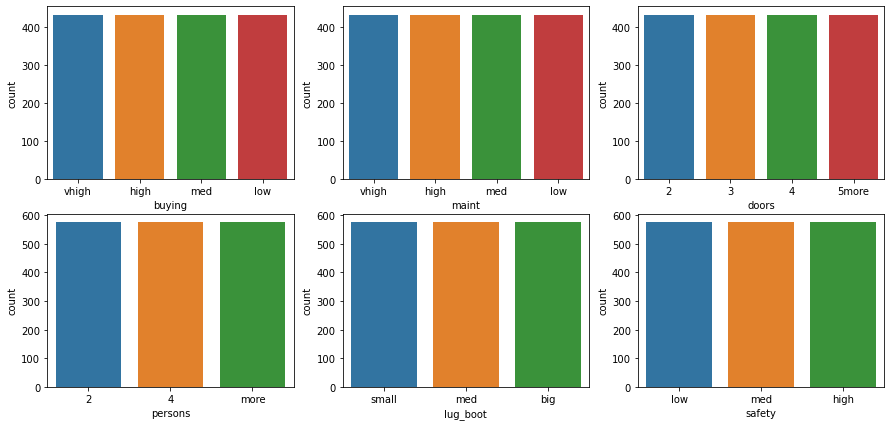

In [51]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
sns.countplot(x = "buying", data = df_car, ax=ax[0,0])
sns.countplot(x = "maint", data = df_car, ax=ax[0,1])
sns.countplot(x = "doors", data = df_car, ax=ax[0,2])
sns.countplot(x = "persons", data = df_car, ax=ax[1,0])
sns.countplot(x = "lug_boot", data = df_car, ax=ax[1,1])
sns.countplot(x = "safety", data = df_car, ax=ax[1,2])
plt.show()

Les données sont réparties de manière équitables entre les différents attributs.

### Répartition des données en fonction des classes.

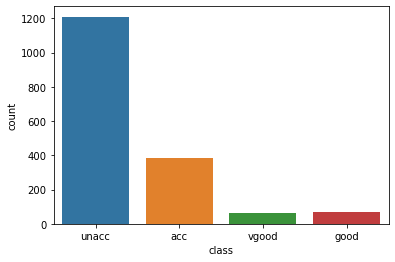

In [52]:
sns.countplot(x = "class", data = df_car)
plt.show()

Il y a une grande majorité de données ayant pour classe "unacc" à l'inverse des autres classes. Nous devons équilibrer cette répartition pour favoriser l'apprentissage de nos modèles.

## *Data reduction*.

### Reduction des données de la classe "unacc".

In [53]:
df_car_unacc = df_car[df_car["class"] == "unacc"].sample(frac=0.33)
df_car_unacc

,buying,maint,doors,persons,lug_boot,safety,class
511,high,vhigh,4,more,big,med,unacc
273,vhigh,med,4,2,med,low,unacc
1464,low,high,4,2,big,low,unacc
23,vhigh,vhigh,2,more,med,high,unacc
1309,low,vhigh,2,4,med,med,unacc
...,...,...,...,...,...,...,...
301,vhigh,med,5more,2,med,med,unacc
1163,med,med,5more,2,small,high,unacc
1455,low,high,3,more,big,low,unacc
1030,med,high,4,2,med,med,unacc


### Répartition des données prises aléatoirement.

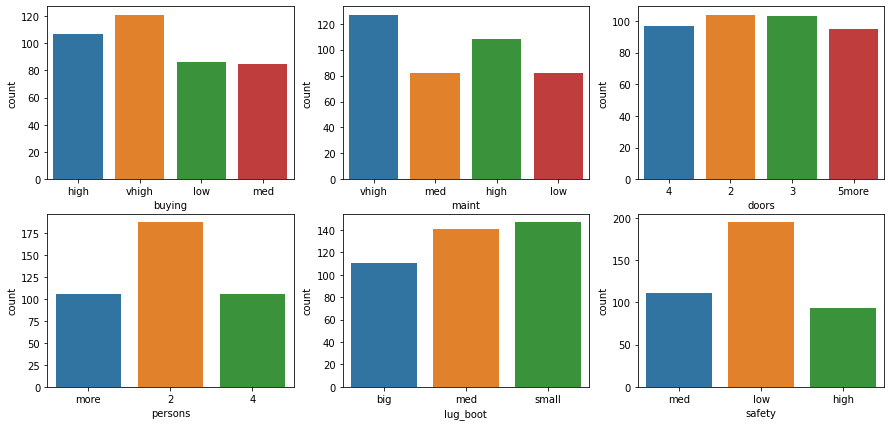

In [54]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
sns.countplot(x = "buying", data = df_car_unacc, ax=ax[0,0])
sns.countplot(x = "maint", data = df_car_unacc, ax=ax[0,1])
sns.countplot(x = "doors", data = df_car_unacc, ax=ax[0,2])
sns.countplot(x = "persons", data = df_car_unacc, ax=ax[1,0])
sns.countplot(x = "lug_boot", data = df_car_unacc, ax=ax[1,1])
sns.countplot(x = "safety", data = df_car_unacc, ax=ax[1,2])
plt.show()

### Construction du datset réduit.

In [55]:
df_car_sans_unacc = df_car[df_car["class"] != "unacc"]
df_car_reduc = pd.concat([df_car_unacc, df_car_sans_unacc], axis=0)
df_car_reduc = df_car_reduc.reset_index(drop=True)
df_car_reduc

,buying,maint,doors,persons,lug_boot,safety,class
0,high,vhigh,4,more,big,med,unacc
1,vhigh,med,4,2,med,low,unacc
2,low,high,4,2,big,low,unacc
3,vhigh,vhigh,2,more,med,high,unacc
4,low,vhigh,2,4,med,med,unacc
...,...,...,...,...,...,...,...
912,low,low,5more,more,small,high,good
913,low,low,5more,more,med,med,good
914,low,low,5more,more,med,high,vgood
915,low,low,5more,more,big,med,good


### Suppression des classes vgood et good.
Il y a trop peu des données dans ces classes pour faire de la data augmentations. Nous décidons de les supprimer.

In [56]:
reduc_classes = ["unacc", "acc"]
df_car_reduc = df_car_reduc[df_car_reduc["class"].isin(reduc_classes)]
df_car_reduc = df_car_reduc.reset_index(drop=True)
df_car = df_car_reduc
df_car

,buying,maint,doors,persons,lug_boot,safety,class
0,high,vhigh,4,more,big,med,unacc
1,vhigh,med,4,2,med,low,unacc
2,low,high,4,2,big,low,unacc
3,vhigh,vhigh,2,more,med,high,unacc
4,low,vhigh,2,4,med,med,unacc
...,...,...,...,...,...,...,...
778,low,low,3,more,small,med,acc
779,low,low,4,4,small,med,acc
780,low,low,4,more,small,med,acc
781,low,low,5more,4,small,med,acc


### Nouvelle répartition des classes.

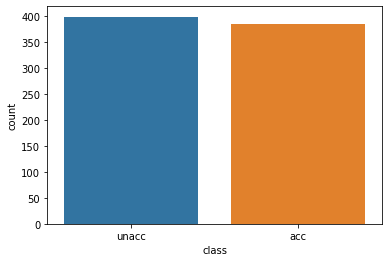

In [57]:
sns.countplot(x = "class", data = df_car)
plt.show()

### *features selection*

Via *Reduct*

In [58]:
reduct(df_car, "class")

pos_c [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

KeyboardInterrupt: 

## Data cleaning.
### Valeurs manquantes.

In [ ]:
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Aucune valeur manquantes.

## Découpage du dataset en trainset et testset.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_car.drop("class", axis=1).to_numpy()
y = df_car["class"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.2)
"train", X_train.shape, y_train.shape, "test", X_test.shape, y_test.shape

('train', (1382, 6), (1382,), 'test', (346, 6), (346,))

## *Data transformation*.

### Encodage de la classe.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder_y = LabelEncoder()
y_train_encode = encoder_y.fit_transform(y_train)
y_test_encode = encoder_y.fit_transform(y_test)
y_train_encode

array([0, 2, 1, ..., 2, 2, 2])

### Encodage des attributs.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder_x = OrdinalEncoder(dtype=np.int32)
X_train_encode = encoder_x.fit_transform(X_train)
X_test_encode = encoder_x.fit_transform(X_test)
X_train_encode

array([[0, 0, 3, 2, 1, 2],
       [2, 1, 3, 0, 0, 2],
       [1, 2, 2, 2, 0, 2],
       ...,
       [3, 3, 0, 0, 1, 0],
       [3, 0, 0, 1, 0, 1],
       [1, 2, 0, 0, 0, 2]])

In [ ]:
# from sklearn import datasets

# # Import example data.
# iris = datasets.load_iris()
# X2 = iris.data
# y2 = iris.target

# # Split into train and test sets.
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify=y2, random_state=0, test_size=0.2)
# X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

In [ ]:
# def compare_array(array, array2):
# 	comparaison = array == array2
# 	equal_arrays = comparaison.all()
# 	return equal_arrays

In [ ]:
# from sklearn.metrics import accuracy_score, roc_auc_score
# from sklearn.model_selection import train_test_split

# from frlearn.base import probabilities_from_scores, select_class
# from frlearn.classifiers import FRNN
# from frlearn.feature_preprocessors import RangeNormaliser

# # Create an instance of the FRNN classifier, construct the model, and query on the test set.
# clf = FRNN(preprocessors=(RangeNormaliser(), ))
# model = clf(X_train, y_train_encode)
# scores = model(X_test)

# # Convert scores to probabilities and calculate the AUROC.
# probabilities = probabilities_from_scores(scores)
# auroc = roc_auc_score(y_test_encode, probabilities, multi_class='ovo')
# print('AUROC:', auroc)

# # Select classes with the highest scores and calculate the accuracy.
# classes = select_class(scores)
# accuracy = accuracy_score(y_test_encode, classes)
# print('accuracy:', accuracy)

In [ ]:
# # Create an instance of the FRNN classifier, construct the model, and query on the test set.
# clf2 = FRNN(preprocessors=(RangeNormaliser(), ))
# model2 = clf2(X_train2, y_train2)
# scores2 = model2(X_test2)

# # Convert scores to probabilities and calculate the AUROC.
# probabilities2 = probabilities_from_scores(scores2)
# auroc2 = roc_auc_score(y_test2, probabilities2, multi_class='ovo')
# print('AUROC:', auroc2)

# # Select classes with the highest scores and calculate the accuracy.
# classes2 = select_class(scores2)
# accuracy2 = accuracy_score(y_test2, classes2)
# print('accuracy:', accuracy2)

Normalisation.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
# X_train

Test de l'algorithme de quickReduct.

In [ ]:
# qr = quickReduct(df_iris, "Species")
# qr

Utilisation d'un autre algorithme de RST.

In [ ]:
# from scikit_roughsets.rs_reduction import RoughSetsSelector
# from sklearn.model_selection import train_test_split

# selector = RoughSetsSelector()
# X_train_selected = selector.fit(X_train, y_train).transform(X_train)
# features = list(df_iris.columns)
# features.remove("Species")
# A = list(np.array(features)[selector.get_support()])
# A

Utilisations d'autres méthodes de features selection.

Variance Threshold.

In [ ]:
# from sklearn.feature_selection import VarianceThreshold
# X.var(axis=0)

In [ ]:
# selector_variance = VarianceThreshold(threshold=0.5)
# selector_variance.fit_transform(X)
# features = list(df_iris)
# features.remove("Species")
# variance = list(np.array(features)[selector_variance.get_support()])
# variance

SelectKBest.

In [ ]:
# from sklearn.feature_selection import SelectKBest, chi2

# chi2(X, y)

In [ ]:
# selector_k_best = SelectKBest(chi2, k=3)
# selector_k_best.fit_transform(X, y)
# k_best = list(np.array(features)[selector_k_best.get_support()])
# k_best

Comparaison.

In [ ]:
# "qr", qr, "A", A, "variance", variance

In [ ]:
# diff_list(qr, variance)

In [ ]:
# diff_list(variance, k_best)